### test deepar tensorflow

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from numpy.random import normal
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from indycar.model.deepartf.dataset.time_series import MockTs
from indycar.model.deepartf.model.lstm import DeepAR

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.


In [2]:
def get_sample_prediction_gaussian(sample, fn):
    sample = np.array(sample).reshape(1, _seq_len, 1)
    output = fn([sample])
    samples = []
    for mu,sigma in zip(output[0].reshape(_seq_len), output[1].reshape(_seq_len)):
        samples.append(normal(loc=mu, scale=np.sqrt(sigma), size=1)[0])
    return np.array(samples)

def get_sample_prediction(sample, model, verbose = False):
    sample = np.array(sample).reshape(1, _seq_len, 1)
    output = model.predict([sample])
    
    output2 = np.zeros((_seq_len, len(output)))
    for idx, x in enumerate(output):
        output2[:,idx] = x.reshape(_seq_len)
        
    #output2 = np.array(output).reshape(_seq_len, -1)
    if verbose:
        print('output.shape=',[len(x) for x in output])
        print('output:', output)
        print('output2.shape=', output2.shape)
        print('output2:', output2)
    
    samples = []
    #for theta in zip(output[0].reshape(_seq_len), output[1].reshape(_seq_len)):
    for theta in output2:
        samples.append(model.get_sample(theta))
    return np.array(samples)

In [3]:
def predict(model):
    #batch = ts.next_batch(_batch_size, _seq_len)
    batch = ts.next_batch(1, _seq_len)

    #get_sample_prediction(batch[0], model, verbose=True)
    #get_sample_prediction(batch[0], model, verbose=True)
    
    ress = []
    for i in tqdm.tqdm(range(300)):
        #ress.append(get_sample_prediction(batch[0], model.predict_theta_from_input))
        ress.append(get_sample_prediction(batch[0], model))

    res_df = pd.DataFrame(ress).T
    tot_res = res_df

    plt.plot(batch[1].reshape(_seq_len), linewidth=6)
    tot_res['mu'] = tot_res.apply(lambda x: np.mean(x), axis=1)
    tot_res['upper'] = tot_res.apply(lambda x: np.mean(x) + np.std(x), axis=1)
    tot_res['lower'] = tot_res.apply(lambda x: np.mean(x) - np.std(x), axis=1)
    tot_res['two_upper'] = tot_res.apply(lambda x: np.mean(x) + 2*np.std(x), axis=1)
    tot_res['two_lower'] = tot_res.apply(lambda x: np.mean(x) - 2*np.std(x), axis=1)

    plt.plot(tot_res.mu, 'bo')
    plt.plot(tot_res.mu, linewidth=2)
    plt.fill_between(x = tot_res.index, y1=tot_res.lower, y2=tot_res.upper, alpha=0.5)
    plt.fill_between(x = tot_res.index, y1=tot_res.two_lower, y2=tot_res.two_upper, alpha=0.5)
    plt.title('Prediction uncertainty')
    
    return batch, tot_res

In [4]:
ts = MockTs()
_context_len = 20
_prediction_len = 2
_batch_size = 32
_seq_len = _context_len + _prediction_len

In [8]:
dp_model = DeepAR(ts, epochs=50)
#dp_model.instantiate_and_fit()
dp_model.fit()
#predict(dp_model)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 22, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 22, 4)             96        
_________________________________________________________________
main_output (GaussianLayer)  [(None, 22, 1), (None, 22 10        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 2s 49ms/step - loss: 16.8054
Epoch 2/50
50/50 [==============================] - 2s 40ms/step - loss: 13.4034
Epoch 3/50
50/50 [==============================] - 2s 40ms/step - loss: 11.1802
Epoch 4/50
50/50 [==============================] - 2s 39ms/step - loss: 9.3358
Epoch 5/50
50/50 [==============================] - 2s 43ms/step - l

  7%|▋         | 22/300 [00:00<00:01, 211.05it/s]

output.shape= [1, 1]
output: [array([[[1.0713279],
        [2.3211107],
        [2.1309934],
        [1.8280344],
        [1.8905385],
        [2.0471513],
        [2.2147326],
        [2.3950162],
        [2.5903637],
        [2.7945368],
        [2.9984026],
        [3.1927466],
        [3.36941  ],
        [3.5223517],
        [3.6484704],
        [3.7477493],
        [3.822618 ],
        [3.8768396],
        [3.9143658],
        [3.9385   ],
        [3.9514198],
        [3.9539247]]], dtype=float32), array([[[0.65146106],
        [0.4968472 ],
        [0.47143316],
        [0.46463162],
        [0.45125782],
        [0.44702408],
        [0.4480577 ],
        [0.45080122],
        [0.45376888],
        [0.45623177],
        [0.45782954],
        [0.45852676],
        [0.45853773],
        [0.45818767],
        [0.4577716 ],
        [0.45746356],
        [0.45729807],
        [0.45720595],
        [0.4570698 ],
        [0.4567719 ],
        [0.4562242 ],
        [0.45538652]]], dtyp

100%|██████████| 300/300 [00:01<00:00, 177.18it/s]


[[[1.90432942]
  [1.85177725]
  [1.83555968]
  [1.85789685]
  [1.91944721]
  [2.01928013]
  [2.15491184]
  [2.32240334]
  [2.51651626]
  [2.73092057]
  [2.95844584]
  [3.19136597]
  [3.42170609]
  [3.64155941]
  [3.84340136]
  [4.02038847]
  [4.16663013]
  [4.27742242]
  [4.34943452]
  [4.38084056]
  [4.3713913 ]
  [4.32242313]]]
[[[1.85177725]
  [1.83555968]
  [1.85789685]
  [1.91944721]
  [2.01928013]
  [2.15491184]
  [2.32240334]
  [2.51651626]
  [2.73092057]
  [2.95844584]
  [3.19136597]
  [3.42170609]
  [3.64155941]
  [3.84340136]
  [4.02038847]
  [4.16663013]
  [4.27742242]
  [4.34943452]
  [4.38084056]
  [4.3713913 ]
  [4.32242313]
  [4.23680377]]]


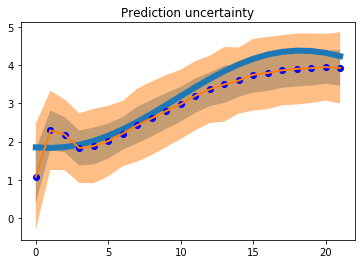

In [9]:
batch, df = predict(dp_model)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,mu,upper,lower,two_upper,two_lower
0,1.311183,2.061705,0.045480,1.590161,-0.075705,0.401992,1.253692,1.369261,0.247497,1.144077,...,2.176975,-0.170843,-0.715591,1.288570,1.303160,1.083203,1.778003,0.390707,2.472796,-0.308613
1,3.004256,2.449078,2.434751,2.193662,1.376255,2.668704,2.703019,2.277810,2.064113,1.368726,...,2.066195,1.726081,3.059421,2.728002,2.686043,2.295061,2.811651,1.780184,3.328236,1.260233
2,3.031528,2.064202,2.240276,2.501619,1.819454,2.313286,2.430485,1.281846,2.203837,2.267626,...,2.087670,2.123651,2.366853,2.762566,2.051040,2.180166,2.641999,1.719864,3.103827,1.255026
3,1.912724,2.588167,1.374113,1.673907,1.393059,1.147905,1.388809,2.800043,1.694240,2.261901,...,2.090110,1.358873,1.686736,1.229232,0.988032,1.831856,2.287996,1.377230,2.744130,0.918123
4,1.900649,1.136181,1.766083,2.042980,1.323327,1.646044,1.304981,2.423053,2.145426,2.544629,...,1.433855,1.609035,1.840204,1.808184,1.624195,1.886429,2.371513,1.402955,2.856591,0.914716
5,2.280993,2.336355,2.567445,1.867496,1.344067,1.302044,1.988616,1.744343,1.482001,2.192021,...,1.644219,2.001436,1.552010,1.558436,1.448324,2.015436,2.476141,1.556259,2.936840,1.092557
6,1.838496,1.556553,1.579977,2.211024,2.878571,2.472208,2.449755,2.360338,1.860961,1.581837,...,1.633185,2.417966,2.801471,1.955810,1.644355,2.212099,2.638913,1.786701,3.065722,1.357110
7,2.029645,2.694233,2.540427,2.258979,2.325030,2.072540,3.327199,2.286514,2.883403,2.738569,...,3.224384,1.404868,2.124521,2.139924,2.509543,2.433155,2.909991,1.957901,3.386822,1.477962
8,2.313624,2.365280,2.394274,2.988324,2.730026,2.097527,2.799021,2.719282,2.464253,2.650804,...,2.146318,2.277954,2.000698,2.197525,3.708758,2.613190,3.094083,2.133893,3.574971,1.649871
9,3.260931,2.635313,2.877710,2.636866,2.665288,2.072877,2.601648,1.711628,2.845721,2.325007,...,3.357411,3.278865,3.070628,2.724530,3.270692,2.802289,3.271361,2.334773,3.740428,1.862650


100%|██████████| 300/300 [00:02<00:00, 109.82it/s]


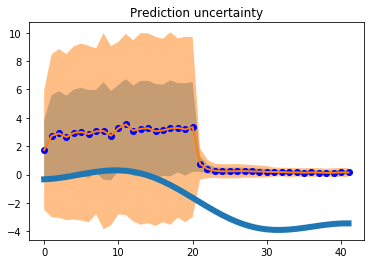

In [27]:
predict(dp_model)

In [5]:
model2 = DeepAR(ts, epochs=5,with_custom_nn_structure=DeepAR.encoder_decoder)
model2.fit()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 22, 40)            6720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 22, 40)            12960     
_________________________________________________________________
main_output (GaussianLayer)  [(None, 22, 1), (None, 22 82        
Total params: 19,762
Trainable params: 19,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 6s 115ms/step - loss: 6.9984
Epoch 2/5
50/50 [==============================] - 4s 86ms/step - loss: 3.3416
Epoch 3/5
50/50 [==============================] - 4s 82ms/step - loss: 2.9479
Epoch 4/5
50/50

100%|██████████| 300/300 [00:05<00:00, 59.71it/s]


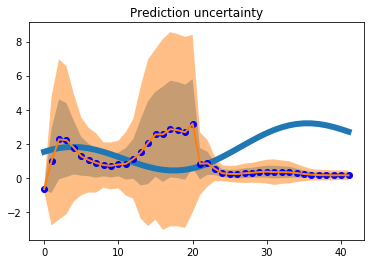

In [19]:
predict(model2)

In [6]:
#model2 = DeepAR(ts, epochs=5,distribution='StudentT')
model4 = DeepAR(ts, epochs=5,distribution='StudentT')
model4.fit()

y_true.shape=(None, None, None)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 22, 1)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 22, 4)             96        
_________________________________________________________________
main_output (StudentTLayer)  [(None, 22, 1), (None, 22 15        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 3s 59ms/step - loss: 3.0622
Epoch 2/5
50/50 [==============================] - 2s 39ms/step - loss: 2.7065
Epoch 3/5
50/50 [==============================] - 2s 36ms/step - loss: 2.4855
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 2.4080
Epoch 5/5
50/50 [==========================

  2%|▏         | 6/300 [00:00<00:05, 55.21it/s]

output.shape= [1, 1, 1]
output: [array([[[ 0.8955498 ],
        [ 0.59615463],
        [ 0.3555671 ],
        [ 0.16987586],
        [ 0.03434908],
        [-0.05613708],
        [-0.10615766],
        [-0.11887038],
        [-0.09541583],
        [-0.03466499],
        [ 0.06647193],
        [ 0.21161759],
        [ 0.40166855],
        [ 0.630044  ],
        [ 0.8798489 ],
        [ 1.1280327 ],
        [ 1.3549794 ],
        [ 1.5501493 ],
        [ 1.7105055 ],
        [ 1.837045  ],
        [ 1.932709  ],
        [ 2.0011673 ]]], dtype=float32), array([[[0.9646421 ],
        [1.093653  ],
        [1.2071588 ],
        [1.3002872 ],
        [1.3707383 ],
        [1.4181081 ],
        [1.4429919 ],
        [1.4461789 ],
        [1.428125  ],
        [1.3888016 ],
        [1.3280724 ],
        [1.2468332 ],
        [1.1489187 ],
        [1.0427747 ],
        [0.9405576 ],
        [0.85349506],
        [0.78699166],
        [0.7401552 ],
        [0.70887816],
        [0.68868005],
   

100%|██████████| 300/300 [00:07<00:00, 39.63it/s]


[[[-0.3663983 ]
  [-0.49976168]
  [-0.60379928]
  [-0.67351587]
  [-0.70524592]
  [-0.69680025]
  [-0.64755382]
  [-0.5584712 ]
  [-0.43206867]
  [-0.27231449]
  [-0.08447133]
  [ 0.12511295]
  [ 0.34925769]
  [ 0.58023504]
  [ 0.81007736]
  [ 1.03089414]
  [ 1.23518588]
  [ 1.41614228]
  [ 1.567913  ]
  [ 1.68584011]
  [ 1.76664299]
  [ 1.80854828]]]
[[[-0.49976168]
  [-0.60379928]
  [-0.67351587]
  [-0.70524592]
  [-0.69680025]
  [-0.64755382]
  [-0.5584712 ]
  [-0.43206867]
  [-0.27231449]
  [-0.08447133]
  [ 0.12511295]
  [ 0.34925769]
  [ 0.58023504]
  [ 0.81007736]
  [ 1.03089414]
  [ 1.23518588]
  [ 1.41614228]
  [ 1.567913  ]
  [ 1.68584011]
  [ 1.76664299]
  [ 1.80854828]
  [ 1.81135977]]]


((array([[[-0.3663983 ],
          [-0.49976168],
          [-0.60379928],
          [-0.67351587],
          [-0.70524592],
          [-0.69680025],
          [-0.64755382],
          [-0.5584712 ],
          [-0.43206867],
          [-0.27231449],
          [-0.08447133],
          [ 0.12511295],
          [ 0.34925769],
          [ 0.58023504],
          [ 0.81007736],
          [ 1.03089414],
          [ 1.23518588],
          [ 1.41614228],
          [ 1.567913  ],
          [ 1.68584011],
          [ 1.76664299],
          [ 1.80854828]]]),
  array([[[-0.49976168],
          [-0.60379928],
          [-0.67351587],
          [-0.70524592],
          [-0.69680025],
          [-0.64755382],
          [-0.5584712 ],
          [-0.43206867],
          [-0.27231449],
          [-0.08447133],
          [ 0.12511295],
          [ 0.34925769],
          [ 0.58023504],
          [ 0.81007736],
          [ 1.03089414],
          [ 1.23518588],
          [ 1.41614228],
          [ 1.567913  

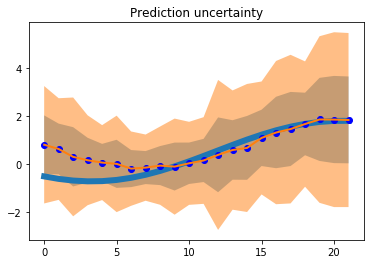

In [7]:
predict(model4)

In [8]:
#model2 = DeepAR(ts, epochs=5,distribution='StudentT')
model3 = DeepAR(ts, epochs=5,distribution='StudentT',with_custom_nn_structure=DeepAR.encoder_decoder)
model3.fit()

y_true.shape=(None, None, None)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 22, 1)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 22, 40)            6720      
_________________________________________________________________
lstm_5 (LSTM)                (None, 22, 40)            12960     
_________________________________________________________________
main_output (StudentTLayer)  [(None, 22, 1), (None, 22 123       
Total params: 19,803
Trainable params: 19,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 5s 101ms/step - loss: 2.9700
Epoch 2/5
50/50 [==============================] - 4s 87ms/step - loss: 1.8962
Epoch 3/5
50/50 [==============================] - 4s 82ms/ste

  1%|          | 3/300 [00:00<00:10, 29.04it/s]

output.shape= [1, 1, 1]
output: [array([[[-1.816719 ],
        [-3.9740524],
        [-5.5563636],
        [-6.0976796],
        [-6.025625 ],
        [-5.8724904],
        [-5.8690257],
        [-6.0323625],
        [-6.2993255],
        [-6.5927916],
        [-6.8537354],
        [-7.052774 ],
        [-7.1852593],
        [-7.259572 ],
        [-7.287595 ],
        [-7.2801046],
        [-7.245766 ],
        [-7.1916933],
        [-7.1242795],
        [-7.04975  ],
        [-6.9743547],
        [-6.904279 ]]], dtype=float32), array([[[0.80520016],
        [0.9438904 ],
        [0.7989764 ],
        [0.59262985],
        [0.4640444 ],
        [0.40292278],
        [0.37935627],
        [0.37495998],
        [0.3796208 ],
        [0.38704643],
        [0.39346218],
        [0.39728045],
        [0.39838877],
        [0.39728978],
        [0.39455223],
        [0.39062548],
        [0.3858534 ],
        [0.38053736],
        [0.37498176],
        [0.36950627],
        [0.36443576],
   

100%|██████████| 300/300 [00:08<00:00, 35.79it/s]


[[[-4.74438862]
  [-5.04389006]
  [-5.355456  ]
  [-5.6712825 ]
  [-5.98336671]
  [-6.28382412]
  [-6.56520108]
  [-6.82077021]
  [-7.04479675]
  [-7.23276544]
  [-7.38155873]
  [-7.4895793 ]
  [-7.55681192]
  [-7.58482235]
  [-7.57669308]
  [-7.53689872]
  [-7.47112585]
  [-7.38604455]
  [-7.28904077]
  [-7.18792012]
  [-7.09059495]
  [-7.00476724]]]
[[[-5.04389006]
  [-5.355456  ]
  [-5.6712825 ]
  [-5.98336671]
  [-6.28382412]
  [-6.56520108]
  [-6.82077021]
  [-7.04479675]
  [-7.23276544]
  [-7.38155873]
  [-7.4895793 ]
  [-7.55681192]
  [-7.58482235]
  [-7.57669308]
  [-7.53689872]
  [-7.47112585]
  [-7.38604455]
  [-7.28904077]
  [-7.18792012]
  [-7.09059495]
  [-7.00476724]
  [-6.9376198 ]]]


((array([[[-4.74438862],
          [-5.04389006],
          [-5.355456  ],
          [-5.6712825 ],
          [-5.98336671],
          [-6.28382412],
          [-6.56520108],
          [-6.82077021],
          [-7.04479675],
          [-7.23276544],
          [-7.38155873],
          [-7.4895793 ],
          [-7.55681192],
          [-7.58482235],
          [-7.57669308],
          [-7.53689872],
          [-7.47112585],
          [-7.38604455],
          [-7.28904077],
          [-7.18792012],
          [-7.09059495],
          [-7.00476724]]]),
  array([[[-5.04389006],
          [-5.355456  ],
          [-5.6712825 ],
          [-5.98336671],
          [-6.28382412],
          [-6.56520108],
          [-6.82077021],
          [-7.04479675],
          [-7.23276544],
          [-7.38155873],
          [-7.4895793 ],
          [-7.55681192],
          [-7.58482235],
          [-7.57669308],
          [-7.53689872],
          [-7.47112585],
          [-7.38604455],
          [-7.28904077

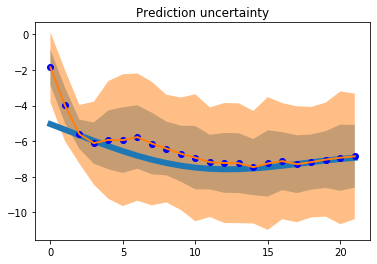

In [9]:
predict(model3)

### test

In [13]:
import tensorflow as tf
# Some Matrix A
A = tf.constant([[[3, 7],
                 [1, 9]],
                [[3, 7],
                 [1, 9]]])

A = tf.constant([[[3, 7],
                 [1, 9]],
                [[3, 7],
                 [1, 9]],
                [[3, 7],
                 [1, 9]]
                ])

#A = A.reshape((1,2,2))

# Some vector v
v = tf.constant([[5],
                 [2]])

# Matrix multiplication of A.v^T
Av = tf.matmul(A, v)

print(('Matrix Multiplication of A and v results in a new Tensor:\n{0}').format(
    Av
))

Matrix Multiplication of A and v results in a new Tensor:
[[[29]
  [23]]

 [[29]
  [23]]

 [[29]
  [23]]]


In [14]:
tf.shape(Av)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 1], dtype=int32)>

In [15]:
tf.shape(A)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 2], dtype=int32)>